### 0. Kütüphanelerin import edilmesi

In [656]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
%matplotlib inline

In [657]:
# Tüm satır ve sütünların notebookta görünmesi için
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### 1. Veri içeriğinin okunması ve pandas dataframede saklanması

In [658]:
os.getcwd()

'C:\\Users\\User\\Desktop\\Hacettepe 2022 Güz\\Veri Düzenleme Yöntemleri\\Sınav\\final'

In [659]:
data = pd.read_csv("./goodreads-export.csv")

In [660]:
data.head(10)

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Recommended For,Recommended By,Owned Copies,Original Purchase Date,Original Purchase Location,Condition,Condition Description,BCID
0,13278990,The Housing Monster,prole.info,"prole.info, prole.info",NaN,160486530X,9.780000e+12,0,3.77,PM Press,Paperback,160.0,2012.0,2011.0,NaN,7/12/2017,currently-reading,currently-reading (#3),currently-reading,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,7805,Pale Fire,Vladimir Nabokov,"Nabokov, Vladimir",NaN,141185260,9.780000e+12,0,4.19,Penguin Books Ltd,Paperback,246.0,2000.0,1962.0,NaN,9/10/2013,to-read,to-read (#26),to-read,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,34220725,Never Use Futura,Doug Thomas,"Thomas, Doug",Ellen Lupton,1616895721,9.780000e+12,4,4.29,Princeton Architectural Press,Paperback,208.0,2017.0,NaN,NaN,12/11/2017,to-read,NaN,read,Pretty good! It's halfway between a coffee-tab...,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,34913288,The Three Pillar Model for Business Decisions:...,George Siedel,"Siedel, George",NaN,NaN,NaN,4,3.00,"Van Rye Publishing, LLC",Kindle Edition,253.0,2017.0,NaN,12/11/2017,9/7/2017,NaN,NaN,read,The bad: like the other business / sales books...,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,11275062,Nixonland: The Rise of a President and the Fra...,Rick Perlstein,"Perlstein, Rick",NaN,1451606265,9.780000e+12,5,4.12,Scribner,ebook,896.0,2010.0,2008.0,11/11/2017,1/10/2017,NaN,NaN,read,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
5,27162486,The Banjo: America's African Instrument,Laurent Dubois,"Dubois, Laurent",NaN,674047842,9.780000e+12,5,4.39,Belknap Press: An Imprint of Harvard Universit...,Hardcover,384.0,2016.0,2016.0,NaN,7/11/2017,to-read,NaN,read,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
6,8219235,Grounding for the Metaphysics of Morals/On a S...,Immanuel Kant,"Kant, Immanuel",NaN,1452841098,9.780000e+12,5,3.80,Createspace,Paperback,94.0,2010.0,1785.0,NaN,23/05/2010,currently-reading,NaN,read,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
7,1407132,Hinduism,Louis Renou,"Renou, Louis",NaN,671478710,9.780000e+12,2,3.09,Pocket Books,Mass Market Paperback,NaN,1971.0,1951.0,NaN,3/7/2007,to-read,NaN,read,"A fast read, but it included too much biased l...",NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
8,29548767,Time Travel: A History,James Gleick,"Gleick, James",NaN,NaN,NaN,2,3.58,Pantheon,Kindle Edition,352.0,2016.0,2016.0,23/06/2017,31/05/2017,NaN,NaN,read,Gleick's 'Time Travel' includes one scene with...,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
9,31416132,The Complacent Class: The Self-Defeating Quest...,Tyler Cowen,"Cowen, Tyler",NaN,NaN,NaN,5,3.64,St. Martin's Press,Kindle Edition,256.0,2017.0,NaN,NaN,11/5/2017,currently-reading,NaN,read,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


### 2. My Review, Spoiler, Private Notes, Recommended For, Recommended By, Original Purchase
### Date, Original Purchase Location, BCID sütunlarını kaldırma

In [661]:
data.columns

Index(['Book Id', 'Title', 'Author', 'Author l-f', 'Additional Authors',
       'ISBN', 'ISBN13', 'My Rating', 'Average Rating', 'Publisher', 'Binding',
       'Number of Pages', 'Year Published', 'Original Publication Year',
       'Date Read', 'Date Added', 'Bookshelves', 'Bookshelves with positions',
       'Exclusive Shelf', 'My Review', 'Spoiler', 'Private Notes',
       'Read Count', 'Recommended For', 'Recommended By', 'Owned Copies',
       'Original Purchase Date', 'Original Purchase Location', 'Condition',
       'Condition Description', 'BCID'],
      dtype='object')

In [662]:
data = data.drop(['My Review', 'Spoiler', 'Private Notes', 'Recommended For', 'Recommended By',\
           'Original Purchase Date', 'Original Purchase Location','BCID'], axis = 1)
data.head(10)

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,Read Count,Owned Copies,Condition,Condition Description
0,13278990,The Housing Monster,prole.info,"prole.info, prole.info",NaN,160486530X,9.780000e+12,0,3.77,PM Press,Paperback,160.0,2012.0,2011.0,NaN,7/12/2017,currently-reading,currently-reading (#3),currently-reading,1,0,NaN,NaN
1,7805,Pale Fire,Vladimir Nabokov,"Nabokov, Vladimir",NaN,141185260,9.780000e+12,0,4.19,Penguin Books Ltd,Paperback,246.0,2000.0,1962.0,NaN,9/10/2013,to-read,to-read (#26),to-read,0,0,NaN,NaN
2,34220725,Never Use Futura,Doug Thomas,"Thomas, Doug",Ellen Lupton,1616895721,9.780000e+12,4,4.29,Princeton Architectural Press,Paperback,208.0,2017.0,NaN,NaN,12/11/2017,to-read,NaN,read,1,0,NaN,NaN
3,34913288,The Three Pillar Model for Business Decisions:...,George Siedel,"Siedel, George",NaN,NaN,NaN,4,3.00,"Van Rye Publishing, LLC",Kindle Edition,253.0,2017.0,NaN,12/11/2017,9/7/2017,NaN,NaN,read,1,0,NaN,NaN
4,11275062,Nixonland: The Rise of a President and the Fra...,Rick Perlstein,"Perlstein, Rick",NaN,1451606265,9.780000e+12,5,4.12,Scribner,ebook,896.0,2010.0,2008.0,11/11/2017,1/10/2017,NaN,NaN,read,1,0,NaN,NaN
5,27162486,The Banjo: America's African Instrument,Laurent Dubois,"Dubois, Laurent",NaN,674047842,9.780000e+12,5,4.39,Belknap Press: An Imprint of Harvard Universit...,Hardcover,384.0,2016.0,2016.0,NaN,7/11/2017,to-read,NaN,read,1,0,NaN,NaN
6,8219235,Grounding for the Metaphysics of Morals/On a S...,Immanuel Kant,"Kant, Immanuel",NaN,1452841098,9.780000e+12,5,3.80,Createspace,Paperback,94.0,2010.0,1785.0,NaN,23/05/2010,currently-reading,NaN,read,1,0,NaN,NaN
7,1407132,Hinduism,Louis Renou,"Renou, Louis",NaN,671478710,9.780000e+12,2,3.09,Pocket Books,Mass Market Paperback,NaN,1971.0,1951.0,NaN,3/7/2007,to-read,NaN,read,1,0,NaN,NaN
8,29548767,Time Travel: A History,James Gleick,"Gleick, James",NaN,NaN,NaN,2,3.58,Pantheon,Kindle Edition,352.0,2016.0,2016.0,23/06/2017,31/05/2017,NaN,NaN,read,1,0,NaN,NaN
9,31416132,The Complacent Class: The Self-Defeating Quest...,Tyler Cowen,"Cowen, Tyler",NaN,NaN,NaN,5,3.64,St. Martin's Press,Kindle Edition,256.0,2017.0,NaN,NaN,11/5/2017,currently-reading,NaN,read,1,0,NaN,NaN


### 3. Book Id sütununu index olarak ayarlama

In [663]:
data = data.set_index("Book Id")


In [664]:
data.head(10)

,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,Read Count,Owned Copies,Condition,Condition Description
Book Id,,,,,,,,,,,,,,,,,,,,,,
13278990,The Housing Monster,prole.info,"prole.info, prole.info",NaN,160486530X,9.780000e+12,0,3.77,PM Press,Paperback,160.0,2012.0,2011.0,NaN,7/12/2017,currently-reading,currently-reading (#3),currently-reading,1,0,NaN,NaN
7805,Pale Fire,Vladimir Nabokov,"Nabokov, Vladimir",NaN,141185260,9.780000e+12,0,4.19,Penguin Books Ltd,Paperback,246.0,2000.0,1962.0,NaN,9/10/2013,to-read,to-read (#26),to-read,0,0,NaN,NaN
34220725,Never Use Futura,Doug Thomas,"Thomas, Doug",Ellen Lupton,1616895721,9.780000e+12,4,4.29,Princeton Architectural Press,Paperback,208.0,2017.0,NaN,NaN,12/11/2017,to-read,NaN,read,1,0,NaN,NaN
34913288,The Three Pillar Model for Business Decisions:...,George Siedel,"Siedel, George",NaN,NaN,NaN,4,3.00,"Van Rye Publishing, LLC",Kindle Edition,253.0,2017.0,NaN,12/11/2017,9/7/2017,NaN,NaN,read,1,0,NaN,NaN
11275062,Nixonland: The Rise of a President and the Fra...,Rick Perlstein,"Perlstein, Rick",NaN,1451606265,9.780000e+12,5,4.12,Scribner,ebook,896.0,2010.0,2008.0,11/11/2017,1/10/2017,NaN,NaN,read,1,0,NaN,NaN
27162486,The Banjo: America's African Instrument,Laurent Dubois,"Dubois, Laurent",NaN,674047842,9.780000e+12,5,4.39,Belknap Press: An Imprint of Harvard Universit...,Hardcover,384.0,2016.0,2016.0,NaN,7/11/2017,to-read,NaN,read,1,0,NaN,NaN
8219235,Grounding for the Metaphysics of Morals/On a S...,Immanuel Kant,"Kant, Immanuel",NaN,1452841098,9.780000e+12,5,3.80,Createspace,Paperback,94.0,2010.0,1785.0,NaN,23/05/2010,currently-reading,NaN,read,1,0,NaN,NaN
1407132,Hinduism,Louis Renou,"Renou, Louis",NaN,671478710,9.780000e+12,2,3.09,Pocket Books,Mass Market Paperback,NaN,1971.0,1951.0,NaN,3/7/2007,to-read,NaN,read,1,0,NaN,NaN
29548767,Time Travel: A History,James Gleick,"Gleick, James",NaN,NaN,NaN,2,3.58,Pantheon,Kindle Edition,352.0,2016.0,2016.0,23/06/2017,31/05/2017,NaN,NaN,read,1,0,NaN,NaN


### 4. Author l-f sütunundaki verileri düzenleme: . Öncesinde anormal karakterler (AZ, a-z “.” “,” dışı) silebilirsiniz

In [665]:
def clean_author_names(author):
    
    author = str(author)
    if author in ("prole.info, prole.info", "NaN", "124, Unknown Author"):
        return 'NaN'
    
    author = author.split(',')

    if len(author) == 1:
        name = filter(lambda x: x.isalpha(), author[0])
        return reduce(lambda x, y: x + y, name)
    
    last_name, first_name = author[0], author[1]
    
    last_name = last_name.capitalize()

    
    first_name_parts = first_name.split()
    
    first_name_new = []
    for part in first_name_parts:
        if part.endswith("."):
            part = part
        else:
            part= part[0].capitalize() + "."
        first_name_new.append(part)
        
        new_first = "".join(first_name_new)

    
    return f'{new_first}{last_name}'

data["Author l-f"] = data["Author l-f"].apply(clean_author_names)


In [666]:
data["Author l-f"].head(10)

Book Id
13278990            NaN
7805          V.Nabokov
34220725       D.Thomas
34913288       G.Siedel
11275062    R.Perlstein
27162486       L.Dubois
8219235          I.Kant
1407132         L.Renou
29548767       J.Gleick
31416132        T.Cowen
Name: Author l-f, dtype: object

### 5. Additional Authors sütunundaki verileri yukarıdaki madde şekline getirin

In [667]:
def format_authors(authors):
    if pd.isnull(authors):
        return authors
    authors = str(authors)
    authors = authors.split(',')
    # Her ek yazar için ilk adı, orta adı ve soyadının ilk harflerini alın
    authors = [f"{author.split()[0][0]}.{author.split()[1][0]}.{author.split()[2]}" 
               if len(author.split()) == 3 else f"{author.split()[0][0]}.{author.split()[1]}" 
               if len(author.split()) == 2 else '' for author in authors]
    # Düzenlenmiş ek yazarları virgülle birleştirin
    return ', '.join(authors)

In [668]:
data["Additional Authors"] = data["Additional Authors"].apply(format_authors)

In [669]:
data["Additional Authors"].tail(10)

Book Id
968             NaN
10176           NaN
4671            NaN
4588            NaN
411321          NaN
2265      S.Jenkins
5562        S.Welch
849747          NaN
439673          NaN
25887           NaN
Name: Additional Authors, dtype: object

### 6. Author l-f ve Additional Authors sütunlarının içeriğini “,” ile birleştirip Author sütununa yerleştirin

In [670]:
data["Author"] = data[["Author l-f","Additional Authors"]].apply(lambda x: ", ".join(x[x.notnull()]), axis = 1)
data["Author"].head(10)

Book Id
13278990                   NaN
7805                 V.Nabokov
34220725    D.Thomas, E.Lupton
34913288              G.Siedel
11275062           R.Perlstein
27162486              L.Dubois
8219235                 I.Kant
1407132                L.Renou
29548767              J.Gleick
31416132               T.Cowen
Name: Author, dtype: object

### 7. ISBN, ISBN13 ve Number of Pages sütununda eksik değerlere 0 atayın

In [671]:
data["ISBN13"] = data["ISBN13"].replace(np.nan, 0)
data["ISBN13"].head(10)

Book Id
13278990    9.780000e+12
7805        9.780000e+12
34220725    9.780000e+12
34913288    0.000000e+00
11275062    9.780000e+12
27162486    9.780000e+12
8219235     9.780000e+12
1407132     9.780000e+12
29548767    0.000000e+00
31416132    0.000000e+00
Name: ISBN13, dtype: float64

In [672]:
data["ISBN"] = data["ISBN"].replace(np.nan, 0)
data["ISBN"].head(10)

Book Id
13278990    160486530X
7805         141185260
34220725    1616895721
34913288             0
11275062    1451606265
27162486     674047842
8219235     1452841098
1407132      671478710
29548767             0
31416132             0
Name: ISBN, dtype: object

In [673]:
data["Number of Pages"] = data["Number of Pages"].replace(np.nan, 0)
data["Number of Pages"].head(10)

Book Id
13278990    160.0
7805        246.0
34220725    208.0
34913288    253.0
11275062    896.0
27162486    384.0
8219235      94.0
1407132       0.0
29548767    352.0
31416132    256.0
Name: Number of Pages, dtype: float64

### 8. Year Published sütunundaki değerleri Original Publication Year’daki değerler ile değiştirin. Eğer original publication year değeri boşsa değiştirmeyin.


In [674]:
data["Year Published"] = np.where(data["Original Publication Year"].fillna(0) !=0, data["Original Publication Year"], data["Year Published"] )
data["Year Published"].head(10)

Book Id
13278990    2011.0
7805        1962.0
34220725    2017.0
34913288    2017.0
11275062    2008.0
27162486    2016.0
8219235     1785.0
1407132     1951.0
29548767    2016.0
31416132    2017.0
Name: Year Published, dtype: float64

### 9. Bookshelves with positions sütununda sadece sayı değerleri kalsın. Eğer sayı yoksa tümden silinsin

In [675]:
# extract("(\d+)") fonksiyonu sadece ilk  sayı örüntüsünü extract ettiğinden ekstra bir işlem yapmamıza gerek kalmadı
data["Bookshelves with positions"]  = data["Bookshelves with positions"].str.extract('(\d+)', expand=False)
data["Bookshelves with positions"].head(10)

Book Id
13278990      3
7805         26
34220725    NaN
34913288    NaN
11275062    NaN
27162486    NaN
8219235     NaN
1407132     NaN
29548767    NaN
31416132    NaN
Name: Bookshelves with positions, dtype: object

### 10. Bookshelves sütunundaki değerleri (dolu olanları) alarak yüzdeler halinde bir Pie Chart ile gösterin

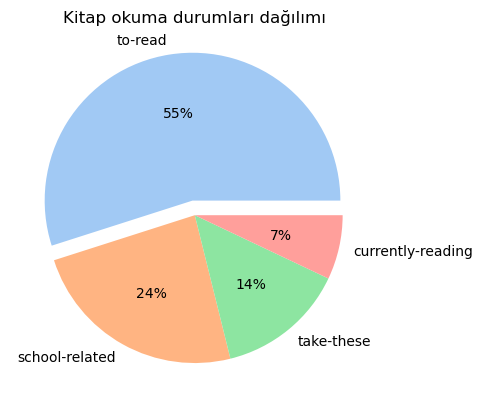

In [676]:
data1 = data.copy()
book_shelves = data1["Bookshelves"].value_counts(normalize = True)


data_book = book_shelves.values
keys_book = book_shelves.index
  
# declaring exploding pie
explode = [0.1, 0, 0, 0,]
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
  
# plotting data on chart
plt.pie(data_book, labels=keys_book, colors=palette_color,
        explode=explode, autopct='%.0f%%')
plt.title("Kitap okuma durumları dağılımı")  
# displaying chart
plt.show()

### 11. Year Published değerlerini bir histogram olarak gösterin.

Text(0, 0.5, 'Adet')

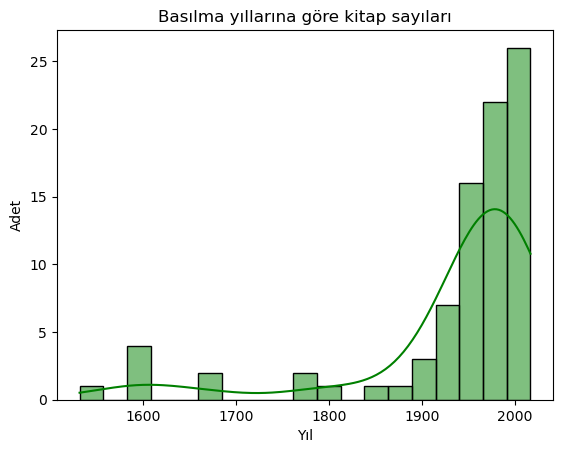

In [677]:
import seaborn as sns
year_published_hist = pd.DataFrame(data["Year Published"].value_counts()).sort_index(ascending = False)
sns.histplot(data = year_published_hist, kde=True, x = year_published_hist.index, color = "green" )
plt.title("Basılma yıllarına göre kitap sayıları")
plt.xlabel("Yıl")
plt.ylabel("Adet")

### 12. Exclusive Shelf değerlerini bir Bar Graph ve Pie Chart ile gösterin

([<matplotlib.patches.Wedge at 0x1f6b2bc9940>,
 [Text(-1.0018113126407733, 0.4542841554192384, 'read'),
  Text(0.9808392367831493, -0.49795018986506, 'to-read'),
  Text(1.1988364210702145, -0.05283214471852979, 'currently-reading')],
 [Text(-0.5464425341676945, 0.24779135750140274, '86%'),
  Text(0.535003220063536, -0.2716091944718509, '12%'),
  Text(0.6993212456242917, -0.03081875108580904, '1%')])

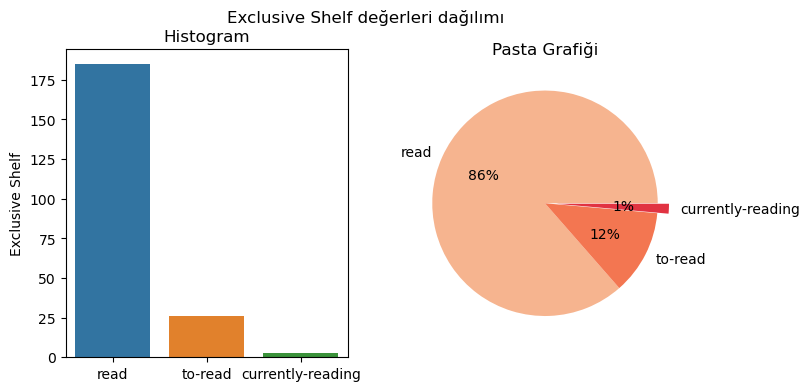

In [678]:
import matplotlib.pyplot as plt
exclusive_shelf_data = data["Exclusive Shelf"].value_counts()
exclusive_shelf_data = pd.DataFrame(exclusive_shelf_data)

figure, axes = plt.subplots(1, 2, figsize= (8,4))
figure.suptitle('Exclusive Shelf değerleri dağılımı')
axes[0].set_title('Histogram')
axes[1].set_title('Pasta Grafiği')

sns.barplot(y=exclusive_shelf_data["Exclusive Shelf"], x =exclusive_shelf_data.index,   orient='v' , ax=axes[0])
# declaring exploding pie
explode = [0, 0, 0.1,]
# define Seaborn color palette to use
palette_color = sns.color_palette('rocket_r')
axes[1].pie(exclusive_shelf_data["Exclusive Shelf"], labels=exclusive_shelf_data.index, colors=palette_color,
        explode=explode, autopct='%.0f%%')


### 13. Number of Pages değerlerini bir histogram olarak gösterin

In [679]:
data["Number of Pages"].describe()

count     214.000000
mean      316.233645
std       219.157074
min         0.000000
25%       204.750000
50%       288.000000
75%       367.750000
max      2346.000000
Name: Number of Pages, dtype: float64

(0.0, 2400.0)

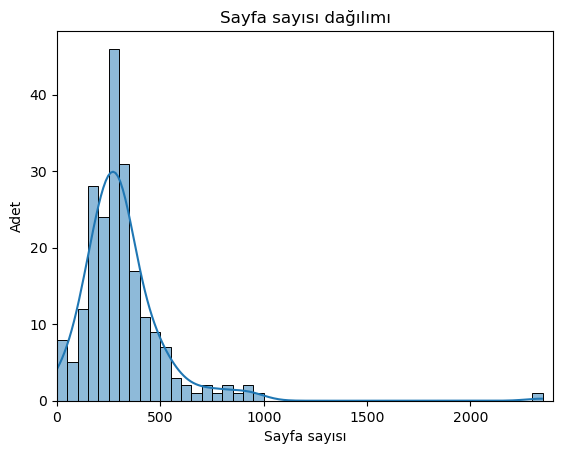

In [680]:
# binwidth  = 50 veya bins = 47 --> :( 2346/50 = 46.9 ~ 47 adet bins değeri girilir.)
sns.histplot(x = data["Number of Pages"], binwidth = 50, kde = True )
plt.title("Sayfa sayısı dağılımı")
plt.xlabel("Sayfa sayısı")
plt.ylabel("Adet")
plt.xlim([0, 2400])

### 14. Binding ve My Rating sütunlarını kullanarak Violin Plot çizin

Text(0, 0.5, 'Oylama')

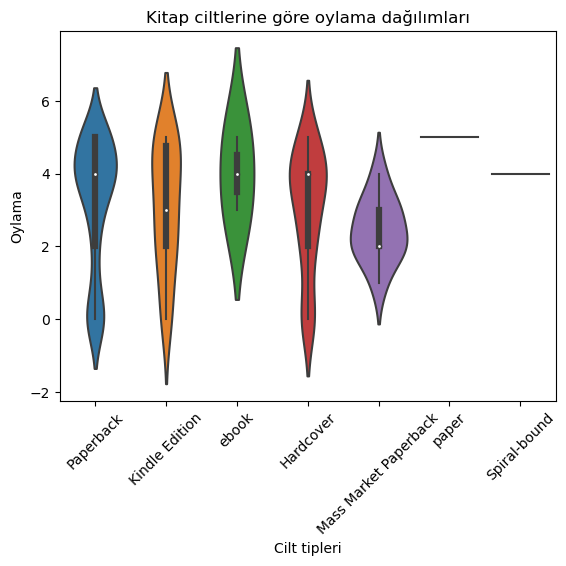

In [681]:
data[["Binding", "My Rating"]]
sns.violinplot(data = data, x = "Binding", y = "My Rating")
plt.xticks(rotation = 45)
plt.title("Kitap ciltlerine göre oylama dağılımları")
plt.xlabel("Cilt tipleri")
plt.ylabel("Oylama")

### 15. Binding ve Average Rating sütunlarını kullanarak Violin Plot çizin

Text(0, 0.5, ' Ortalama oylar')

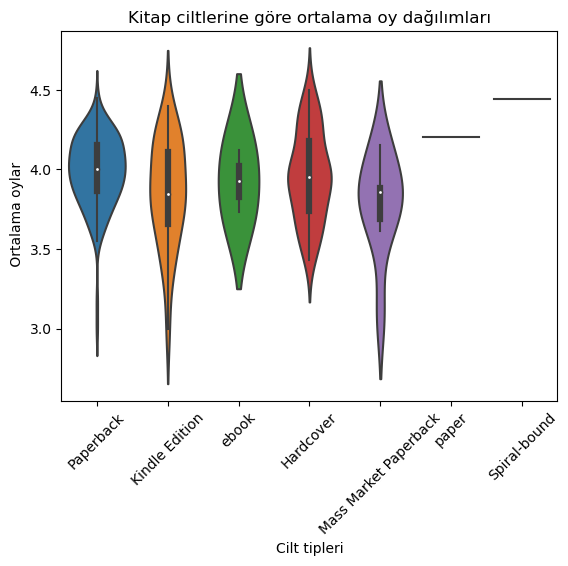

In [682]:
import seaborn as sns
data[["Binding", "Average Rating"]]
sns.violinplot(data = data, x = "Binding", y = "Average Rating")
plt.xticks(rotation = 45)
plt.title("Kitap ciltlerine göre ortalama oy dağılımları")
plt.xlabel("Cilt tipleri")
plt.ylabel(" Ortalama oylar")

### 16. My Rating ve Average Rating değerleri arasında bir scatter plot çizin

Text(0, 0.5, 'Average Rating')

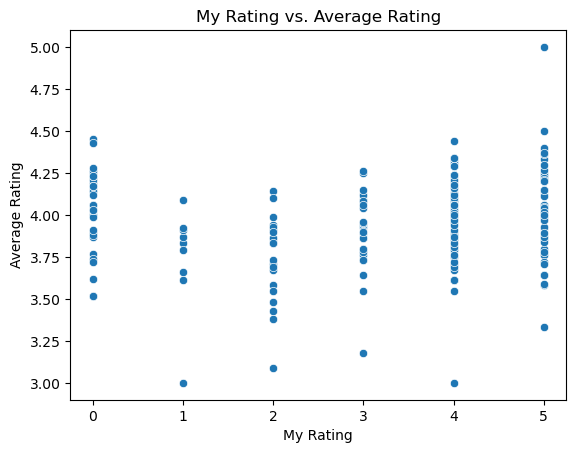

In [683]:
import seaborn as sns
data[["My Rating", "Average Rating"]]
sns.scatterplot(data = data, x = "My Rating", y = "Average Rating")
plt.title("My Rating vs. Average Rating")
plt.xlabel("My Rating")
plt.ylabel("Average Rating")

### 17.Kendi belirlediğiniz iki adet grafiği hem Seaborn, hem de Matplotlib ile çizdirin

#### 17.1 Date Added değerlerine ait histogram grafiğini Seaborn ile gösterme

Text(0, 0.5, 'Kitap sayısı')

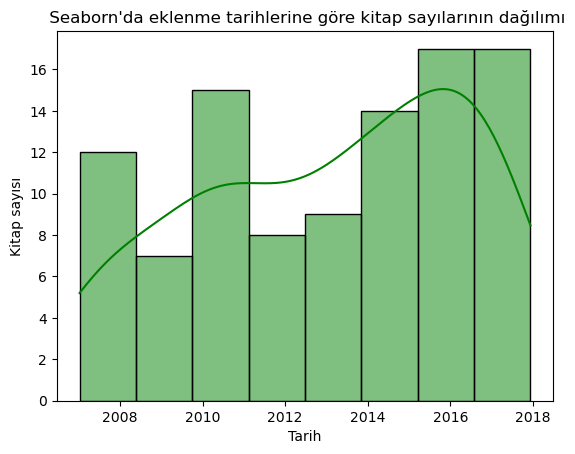

In [684]:
import seaborn as sns
date_added = pd.DataFrame(data.value_counts("Date Added"))
date_added.index = pd.to_datetime(date_added.index)
sns.histplot(data = date_added, x = date_added.index,  kde = True,color = "green")
plt.title(" Seaborn'da eklenme tarihlerine göre kitap sayılarının dağılımı")
plt.xlabel("Tarih")
plt.ylabel("Kitap sayısı")

#### 17.2 Date Added değerlerine ait histogram grafiğini Matplotlib ile gösterme

Text(0, 0.5, 'Kitap sayısı')

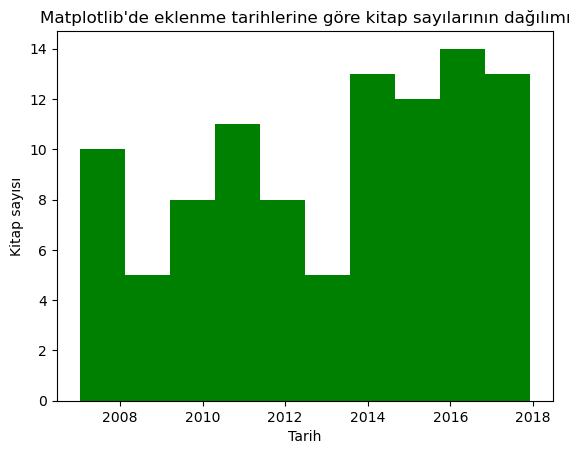

In [685]:
import matplotlib.pyplot as plt
plt.hist(date_added.index, color = "green", )
plt.title("Matplotlib'de eklenme tarihlerine göre kitap sayılarının dağılımı")
plt.xlabel("Tarih")
plt.ylabel("Kitap sayısı")

#### 17.3  Bindinge göre ortalama kitap sayfa sayısını Seaborn gösterme

Text(0.5, 1.0, "Seaborn'da bindinge göre kitap sayfa ortalamaları")

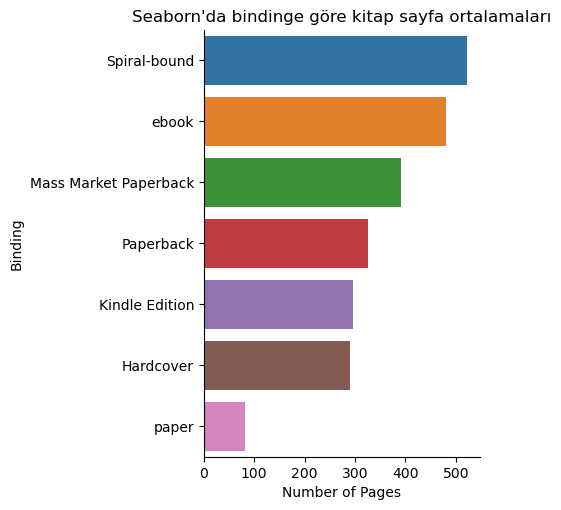

In [686]:
import seaborn as sns
data_bind_page = data.copy()
data_bind_page = data_bind_page.groupby("Binding").mean()[["Number of Pages"]]
data_bind_page.reset_index(inplace  =True)
data_bind_page = data_bind_page.sort_values(by = "Number of Pages", ascending = False)
sns.catplot(y="Binding", x="Number of Pages",
            data=data_bind_page, kind = "bar", orient = "h")
plt.title("Seaborn'da bindinge göre kitap sayfa ortalamaları")

#### 17.4  Bindinge göre ortalama kitap sayfa sayısını Matplotlib ile gösterme

Text(0.5, 1.0, "Matplotlip'de  bindinge göre kitap sayfa ortalamaları")

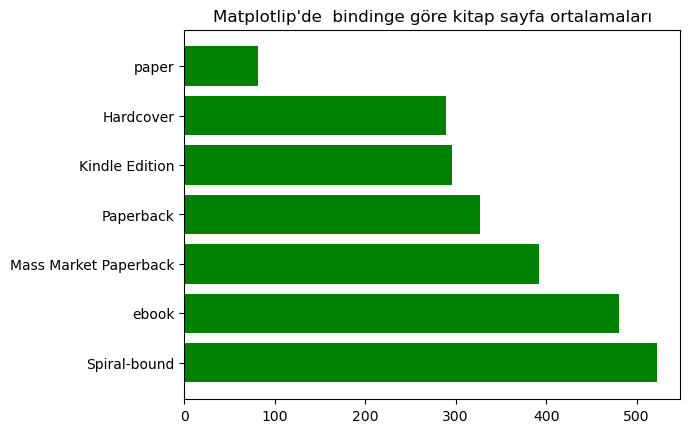

In [688]:
import matplotlib.pyplot as plt
# creating the bar plot
plt.barh(data_bind_page["Binding"], data_bind_page["Number of Pages"], color = "green")
plt.title("Matplotlip'de  bindinge göre kitap sayfa ortalamaları")


### 18. Verinin son halinin başka bir csv içine yazılması

In [651]:
data.to_csv("data_final.csv")